In [2]:
import sys

In [20]:
%load_ext autoreload

%autoreload 2

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
import data

In [5]:
claims_df = pd.read_csv('C:/Users/Ali/Documents/CIBC/claims_final.csv', header=None, names=['family_id','member_id', 'provider_id', 'provider_type', 'state', 'date', 'procedure', 'amount'])

In [6]:
claims = claims_df.to_records(index=False)

In [7]:
np.unique(claims['provider_type'])

array([122398719, 122398732, 122398744, 122398757, 122398769, 122398782,
       122398794, 122398807, 122398819, 122398832, 122398857, 122399961,
       122401188], dtype=int64)

In [8]:
claim = data.subset_query(claims,lambda p : p['provider_type']==122398719)

In [33]:
print(sorted_claim)

[(133728, 1, 14984, 122398719, 'CA', 20060505, 1304, 6973.52)
 (216597, 0, 11038, 122398719, 'CA', 20050922, 1525, 6040.45)
 (326047, 0,  5745, 122398719, 'NY', 20051117, 1514, 4993.14) ...
 (140136, 1, 15815, 122398719, 'FL', 20060202,  282,   10.05)
 (296176, 1, 10433, 122398719, 'FL', 20060112,  282,   10.05)
 (392701, 3, 18418, 122398719, 'FL', 20060415,  282,   10.05)]


In [9]:
small_set = data.subset_query(claims,lambda p : (p['state']=='NY' and p['provider_type']==122398719))

In [36]:
len(small_set)

2234693

In [30]:
procs, avgs = averages(small_set, 'procedure')

TypeError: cannot perform reduce with flexible type

In [ ]:
def average_over_key(x, )

In [29]:
def average(x, key, return_split=False):
    '''dump out a list of average per unique element in x[key]'''
    split = split_by(x,key)
    split_averages = {}
    for k in split.keys():
        split_averages[k] = split

In [49]:
split = split_by(small_set, 'procedure')

In [53]:
def split_by(x, key):
    '''split an array into multiple arrays with matching values of key'''
    keys = np.unique(x[key])
    split_dict = {}
    for k in keys:
        split_dict[k] = []
    for item in x:
        split_dict[item[key]].append(item)
    for key in split_dict.keys():
        split_dict[key] = np.asarray(split_dict[key], dtype=x.dtype)
    return split_dict

In [52]:
def sort_by(x, key, func, return_scores = True):
    '''sort the input array x by the key according to the score per key'''
    keys = np.unique(x[key])
    scores = np.zeros(len(keys))
    for idx, item in enumerate(x):
        scores[np.where(keys==item[key])] += func(item)
        
    sorted_ids = np.argsort(scores)[::-1]
    if return_scores:
        return keys[sorted_ids], scores[sorted_ids]
    else:
        return keys[sorted_ids]

In [22]:
import data

In [24]:
keys_sorted, scores_sorted = data.sort_by(small_set,'procedure', lambda p : p['amount'])

<BarContainer object of 50 artists>

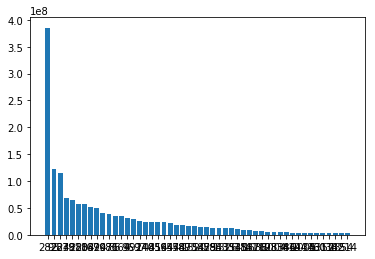

In [27]:
plt.bar(keys_sorted.astype(np.str)[:50], scores_sorted[:50])